<a href="https://colab.research.google.com/github/secondbonana/vision_catdog/blob/main/keras_catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import auth
auth.authenticate_user()

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
!ls /content/drive/MyDrive/deeplearning/ -la
!cp /content/drive/MyDrive/deeplearning/dogs-vs-cats.zip .

total 831618
-rw------- 1 root root 851576689 Feb 14 17:33 dogs-vs-cats.zip


In [14]:
!unzip dogs-vs-cats.zip -d catdog

Archive:  dogs-vs-cats.zip
  inflating: catdog/sampleSubmission.csv  
  inflating: catdog/test1.zip        
  inflating: catdog/train.zip        


In [ ]:
!cd catdog; catdog/test1.zip; catdog/train.zip
# 런타임변경 : GPU

In [ ]:
!ls catdog/train -la

In [27]:
!cd catdog/train; mkdir dogs; mkdir cats

In [29]:
!cd catdog/train; ls | grep -e cat | xargs mv -t cats
!cd catdog/train; ls | grep -e dog | xargs mv -t dogs

mv: cannot move 'cats' to a subdirectory of itself, 'cats/cats'
mv: cannot move 'dogs' to a subdirectory of itself, 'dogs/dogs'


In [34]:
!cd catdog/test1; mkdir dogs; mkdir cats

In [37]:
!cd catdog/test1; ls | grep -e cat | xargs mv -t cats
!cd catdog/test1; ls | grep -e dog | xargs mv -t dogs

mv: cannot move 'cats' to a subdirectory of itself, 'cats/cats'
mv: cannot move 'dogs' to a subdirectory of itself, 'dogs/dogs'


## Let's develop Karas Model!

데이터 전처리

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [53]:
# ImageDataGenerator dataset 을 만드는 객체
# generator = ImageDataGenerator()
generator = ImageDataGenerator(rescale=1/255.)

# flow_from_directory : 경로에서 이미지를 읽어와서 resize 후 32개씩 묶어서 binary는 두가지인 0,1 로 나누어서 가져온다.
train_gen = generator.flow_from_directory('catdog/train', target_size=(64, 64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [54]:
# next로 호출
x_batch, y_batch = next(train_gen)
print(x_batch.shape) # (32, 64, 64, 3) / 이미지개수, 세로, 가로, RGB개수
print(y_batch.shape) # (32,) / 0 또는 1로 되어있는 레이블이 32개 나와있다.

(32, 64, 64, 3)
(32,)


In [ ]:
import matplotlib.pyplot as pit
%matplotlib inline

# 상단에 1.0: 강아지 0.0: 고양이
# pit.imshow(x_batch[0].astype('int32'))
# pit.title(y_batch[0])

# 전체출력
# imshow : 들어오는 방식에 따라 출력을 달리한다. int면 0~255. float면 0~1
for i in range(len(x_batch)):
  pit.imshow(x_batch[i].astype('int32'))
  pit.title(y_batch[i])
  pit.show()


In [ ]:
# x_batch 는 0~255사이의 RGB데이터
x_batch.min()
x_batch.max()


# 0~255가 아닌 0~1 사이의 출력값을 가지도록 바꿔줘야함.
#  이유 : 나중에 수치가 너무 커져버릴 수 있다. 숫자가 너무 커지지않도록 하는 것도 중요한 전처리 방법.
#  해결방안 : generator = ImageDataGenerator() > generator = ImageDataGenerator(rescale=1/255.) 이렇게 변경해주면 0, 1로 나옴.
#   ImageDataGenerator(rescale) 은 값을 곱해준다는 뜻.



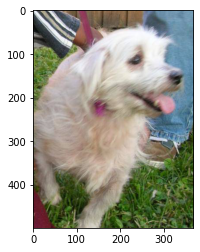

In [73]:
# 원본이미지 출력
from PIL import Image
img = Image.open('catdog/train/dogs/dog.9.jpg')
pit.imshow(img)
pit.show()

Build Model(모델 만들기)

In [76]:
from keras.layers import *
from keras.models import Model

def build_model():
  x = Input(shape=(64, 64, 3))
  out = x
  out = Flatten()(out) # 64*64*3 을 한 줄로 출력
  out = Dense(512, activation='relu')(out) # Flatten 이 너무 크므로 512로 크기를 줄임
  out = Dense(256, activation='relu')(out) # 256 으로 줄임
  out = Dense(64, activation='relu')(out)
  out = Dense(1, activation='sigmoid')(out) # sigmoid 는 0~1까지

  model = Model(x, out)
  return model

In [77]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,439,809
Trainable params: 6,439,809
Non-train

## Let's Train Model!

In [80]:
# 모델학습
model.compile(optimizer='sgd', loss='binary_crossentropy')
history = model.fit(train_gen, epochs=10, steps_per_epoch=len(train_gen)) # 11분 10초

Epoch 1/10
782/782 [==============================] - 71s 90ms/step - loss: 0.6686
Epoch 2/10
782/782 [==============================] - 68s 87ms/step - loss: 0.6479
Epoch 3/10
782/782 [==============================] - 69s 88ms/step - loss: 0.6369
Epoch 4/10
782/782 [==============================] - 67s 86ms/step - loss: 0.6276
Epoch 5/10
782/782 [==============================] - 66s 85ms/step - loss: 0.6209
Epoch 6/10
782/782 [==============================] - 67s 86ms/step - loss: 0.6134
Epoch 7/10
782/782 [==============================] - 69s 88ms/step - loss: 0.6084
Epoch 8/10
782/782 [==============================] - 67s 86ms/step - loss: 0.6016
Epoch 9/10
782/782 [==============================] - 67s 86ms/step - loss: 0.5924
Epoch 10/10
782/782 [==============================] - 67s 86ms/step - loss: 0.5880


In [88]:
# 모델학습
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy']) # metrics 는 확인하고 싶은 지표값을 함수로 넣을 수 있다.
# 즉, 모델을 돌렸을 때 binary_accuracy 의 값으로 정확도는 약 75%정도라고 확인할 수 있다.
# history = model.fit(train_gen, epochs=10, steps_per_epoch=len(train_gen),
                    # validation_split)
history = model.fit(train_gen, epochs=10, steps_per_epoch=len(train_gen))

Epoch 1/10
782/782 [==============================] - 82s 104ms/step - loss: 0.5809 - binary_accuracy: 0.6902
Epoch 2/10
782/782 [==============================] - 68s 87ms/step - loss: 0.5716 - binary_accuracy: 0.6982
Epoch 3/10
782/782 [==============================] - 73s 93ms/step - loss: 0.5654 - binary_accuracy: 0.7018
Epoch 4/10
782/782 [==============================] - 71s 91ms/step - loss: 0.5597 - binary_accuracy: 0.7072
Epoch 5/10
782/782 [==============================] - 70s 89ms/step - loss: 0.5505 - binary_accuracy: 0.7138
Epoch 6/10
782/782 [==============================] - 67s 86ms/step - loss: 0.5432 - binary_accuracy: 0.7214
Epoch 7/10
782/782 [==============================] - 75s 95ms/step - loss: 0.5343 - binary_accuracy: 0.7296
Epoch 8/10
782/782 [==============================] - 73s 93ms/step - loss: 0.5252 - binary_accuracy: 0.7374
Epoch 9/10
782/782 [==============================] - 97s 124ms/step - loss: 0.5173 - binary_accuracy: 0.7389
Epoch 10/10
782/7

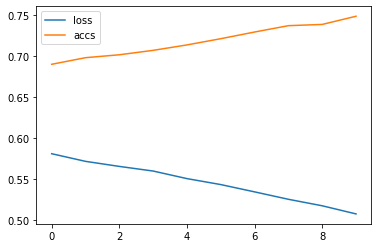

In [90]:
losses = history.history['loss']
accs = history.history['binary_accuracy']

pit.plot(losses, label='loss')
pit.plot(accs, label='accs')
pit.legend() # 범례
pit.show()

## Evaluate and test model

In [81]:
# test1 에 있는 이미지를 가져온다
test_gen = generator.flow_from_directory('catdog', target_size=(64, 64),
                                          batch_size=32, classes=['test1'])

Found 12500 images belonging to 1 classes.


In [82]:
pred = model.predict(test_gen)
pred.shape

391/391 [==============================] - 34s 86ms/step


(12500, 1)

In [ ]:
x_test, y_test = next(test_gen)

for i in range(len(x_test)):
  pit.imshow(x_test[i])
  pit.title(pred[i])
  pit.show()

In [85]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

# np.concatenate 는 뒤에 나오는 numpy array 들의 list([0])를 [1]축 기준으로 합친다.
x_test = np.concatenate(x_tests, axis=0) 
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(12500, 64, 64, 3)
(12500, 1)


1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


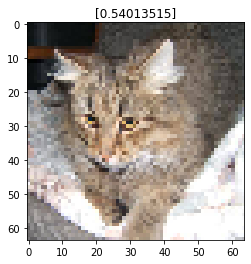

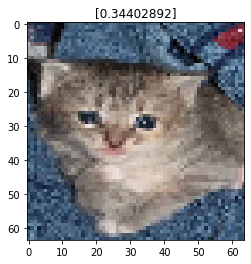

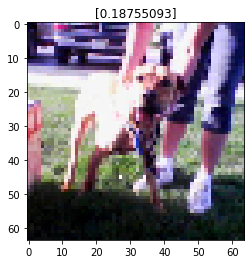

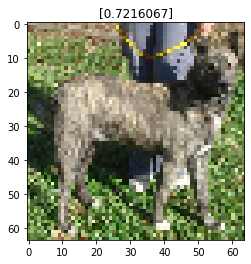

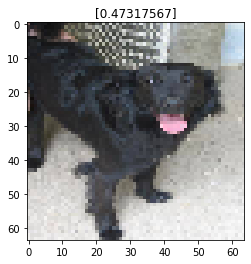

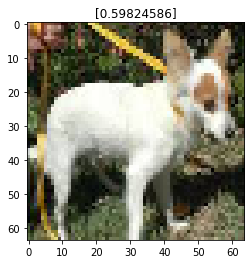

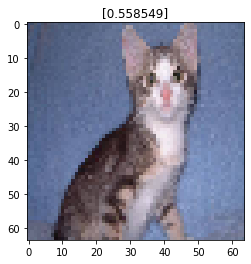

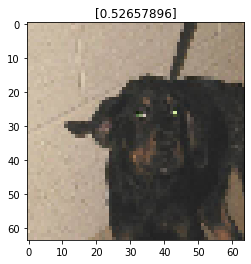

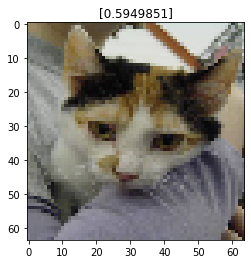

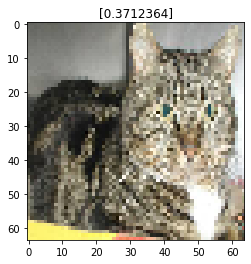

In [87]:
pred = model.predict(x_test[:10])

for i in range(10):
  pit.imshow(x_test[i])
  pit.title(pred[i])
  pit.show()